# Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Numpy utilities
import numpy as np

# File utilities
import os

# FIDIMAG Simulation imports:
from fidimag.atomistic import Sim
from fidimag.atomistic import FDMesh
from fidimag.atomistic import DMI
from fidimag.atomistic import UniformExchange
from fidimag.atomistic import Zeeman
from fidimag.atomistic import Constant

# Simulation

In [3]:
# MESH --------------------------------------------------------------------
# This is a 21x21 spins in a square lattice with a lattice constant of 5
# angstrom and PBCs
mesh = FDMesh(nx=21, ny=21,
              dx=0.5, dy=0.5,
              unit_length=1e-9,
              pbc='2d'
              )

# Initiate a simulation object. PBCs are specified in the mesh
sim = Sim(mesh, name='relax_fm')


# Files

In [12]:
# Generate a list with the filenames of the last step of the
# NEBM from the npys files. We assume the only directories are
# the ones that start with: 'neb_21x21-spins_fm-sk_atomic_k1e10_'
l = len('neb_21x21-spins_fm-sk_atomic_k1e10_')
folder = 'npys/' + sorted(os.listdir('npys/'),
                          key=lambda x: int(x[l:]))[-1]

# Order the files in the folder. We need to sort them
# according to the number. Remeber that they are numbered
# as: image_13.npy ...  so we convert the string number to int
file_list = sorted(os.listdir(folder), key=lambda x: int(x[6:-4]))
file_list = [folder + '/' + _file for _file in file_list]

In [13]:
coords = np.array(sim.mesh.pos)

def generate_image(ax, spins):
    m = np.copy(sim.spin).reshape(-1, 3)

    ax.quiver(coords[:, 0], coords[:, 1], 
              m[:, 0], m[:, 1], m[:, 2],
              # Arrow properties (can vary according to the plot)
              cmap='RdYlBu', width=.008, linewidth=1,
              scale=1 / 0.05,
              # Data limits for the colour map
              clim=[-1, 1]
              )

# Skyrmion destruction process

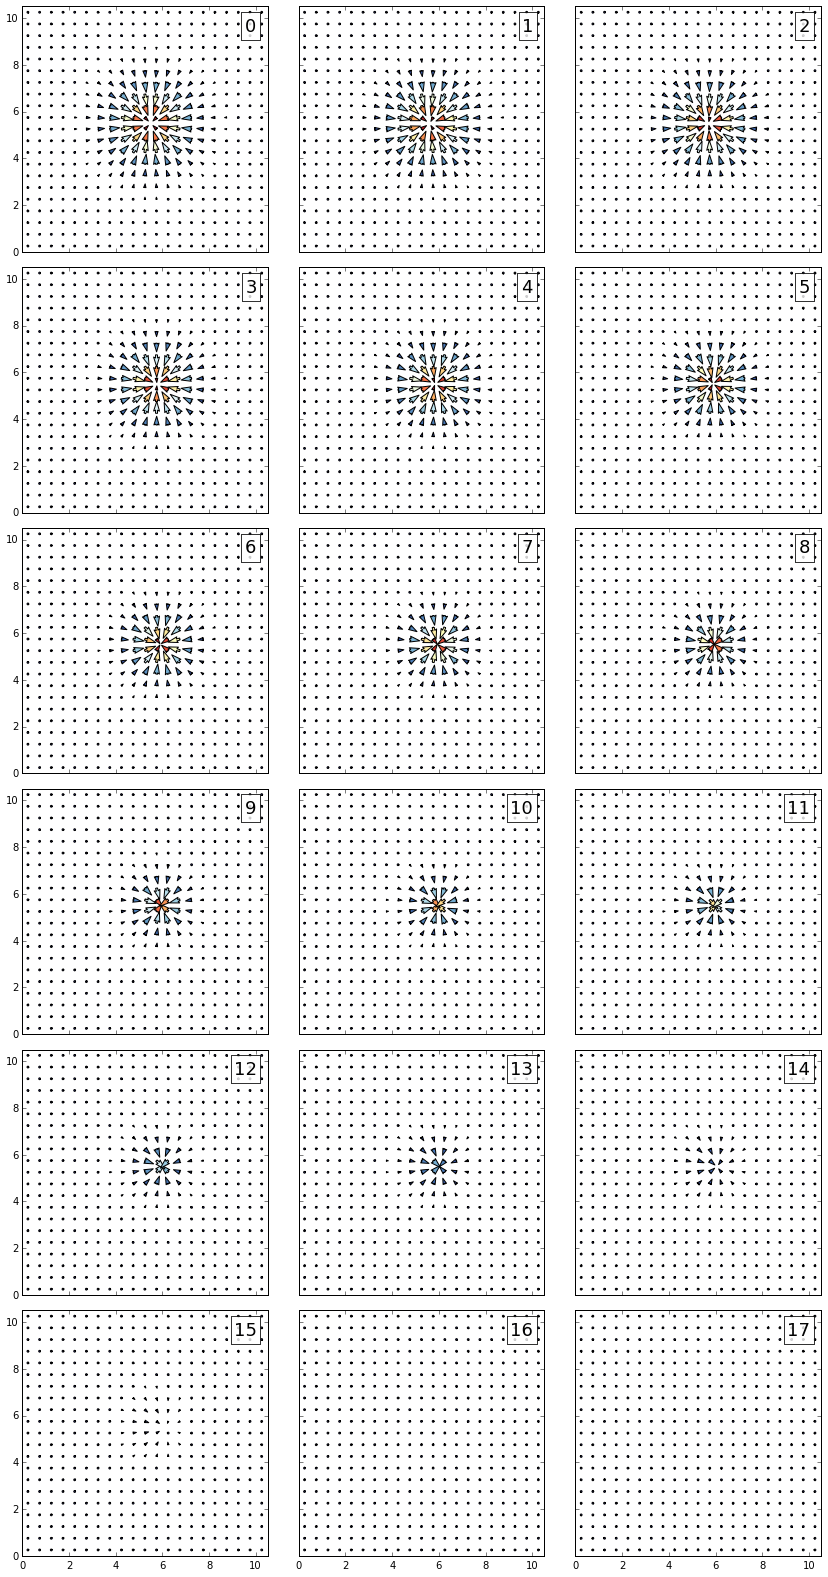

In [14]:
fig = plt.figure(figsize=(12, 22))
# fig, axes = plot.subplots(nrows=6, ncols=3,
#                           sharex=True, sharey=True)

for i in np.arange(len(file_list)):
    sim.set_m(np.load(file_list[i]))
    ax = fig.add_subplot(6, 3, i + 1, aspect=1)
    generate_image(ax, sim.spin)

    ax.set_xlim([0, 10.5])
    ax.set_ylim([0, 10.5])
    
    ax.text(0.95, 0.9, 
            '{}'.format(i),
            transform=ax.transAxes, fontsize=18,
            horizontalalignment='right',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10}
           )

for ax in plt.gcf().axes:
    try:
        ax.label_outer()
    except:
        pass
    
plt.tight_layout()

We can get the energy band from the plot file:

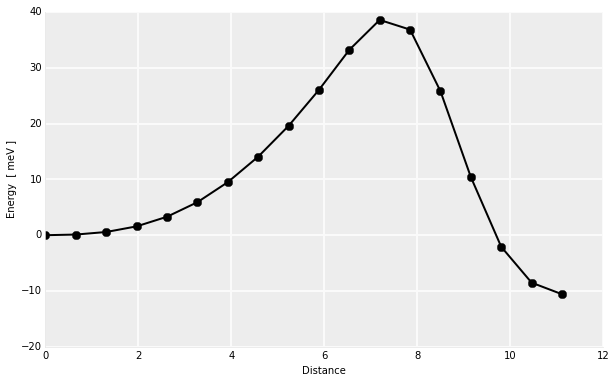

In [81]:
import plot_ebds